In [1]:
import tensorflow as tf
assert float(tf.__version__[:3]) >= 2.3

import os
import numpy as np
import matplotlib.pyplot as plt
import random
import shutil

In [2]:
os.mkdir("/kaggle/train")
os.mkdir("/kaggle/test")

os.mkdir("/kaggle/train/blurImage")
os.mkdir("/kaggle/train/sharpImage")

os.mkdir("/kaggle/test/blurImage")
os.mkdir("/kaggle/test/sharpImage")

In [3]:
path = "/kaggle/input/blur-dataset"
listImage = []

for i in os.listdir(path):
    
    if i=="sharp" or i=="blur_dataset_scaled":
        
        continue
        
    for j in os.listdir(path+"/"+i):
        
        
        try:
        
            if j.split(".")[1]!="JPG" and j.split(".")[1]!="jpg" and j.split(".")[1]!="jpeg":

                pass
        except:
            
            pass
        
        listImage.append(path+"/"+i+"/"+j)
        

random.shuffle(listImage)
train_blur = listImage[0:500]
test_blur = listImage[600:]

print(len(train_blur))
print(len(test_blur))

500
100


In [4]:
for i in train_blur:
    
    image_name = i.split("/")
    image_name = image_name[len(image_name)-1]
    
    try:
        
        shutil.copyfile(i, "/kaggle/train/blurImage/"+image_name)
        
    except:
        
        pass

In [5]:
len(os.listdir("/kaggle/train/blurImage/"))

500

In [6]:
for i in test_blur:
    
    image_name = i.split("/")
    image_name = image_name[len(image_name)-1]

        
    shutil.copyfile(i, "/kaggle/test/blurImage/"+image_name)

In [7]:
len(os.listdir("/kaggle/test/blurImage/"))

100

In [8]:
path = "/kaggle/input/blur-dataset"
listImage = []

for i in os.listdir(path):
    
    if i!="sharp":
        
        continue
    
    for j in os.listdir(path+"/"+i):

        
        try:
        
            if j.split(".")[1]!="JPG" and j.split(".")[1]!="jpg" and j.split(".")[1]!="jpeg":

                pass
        except:
            
            pass
        
        listImage.append(path+"/"+i+"/"+j)
        

random.shuffle(listImage)
train_sharp = listImage[0:300]
test_sharp = listImage[300:]
print(len(train_sharp))
print(len(test_sharp))


300
50


In [9]:
for i in train_sharp:
    
    image_name = i.split("/")
    image_name = image_name[len(image_name)-1]
    
    try:
        
        shutil.copyfile(i, "/kaggle/train/sharpImage/"+image_name)

        
    except:
        
        pass

In [10]:
len(os.listdir("/kaggle/train/sharpImage/"))

300

In [11]:
for i in test_sharp:
    
    image_name = i.split("/")
    image_name = image_name[len(image_name)-1]
    
    try:
        
        shutil.copyfile(i, "/kaggle/test/sharpImage/"+image_name)
        
    except:
        
        pass

In [12]:
len(os.listdir("/kaggle/test/sharpImage/"))

50

In [13]:
IMAGE_SIZE = 600
BATCH_SIZE = 32
path = "/kaggle"

datagen = tf.keras.preprocessing.image.ImageDataGenerator(
#     rescale=1./255, 
    validation_split=0.2)

train_generator = datagen.flow_from_directory(
    path+"/train",
    target_size=(IMAGE_SIZE, IMAGE_SIZE),
    batch_size=BATCH_SIZE, 
    subset='training')

val_generator = datagen.flow_from_directory(
    path+"/test",
    target_size=(IMAGE_SIZE, IMAGE_SIZE),
    batch_size=BATCH_SIZE, 
    subset='validation')

Found 640 images belonging to 2 classes.
Found 30 images belonging to 2 classes.


In [14]:
image_batch, label_batch = next(val_generator)
image_batch.shape, label_batch.shape

((30, 600, 600, 3), (30, 2))

In [15]:
IMG_SHAPE = (IMAGE_SIZE, IMAGE_SIZE, 3)

# Create the base model from the pre-trained MobileNet V2
# base_model = tf.keras.applications.MobileNetV2(input_shape=IMG_SHAPE,
#                                               include_top=False, 
#                                               weights='imagenet')
base_model = tf.keras.applications.MobileNetV3Large(input_shape=IMG_SHAPE, include_top=False, weights='imagenet')
base_model.trainable = False
# model = base_model

17620992/17605208 [==============================] - 2s 0us/step


In [16]:
model = tf.keras.Sequential([
  base_model,
  tf.keras.layers.Conv2D(filters=32, kernel_size=3, activation='relu', padding="SAME"),
  tf.keras.layers.Dropout(0.2),
  tf.keras.layers.GlobalAveragePooling2D(),
  tf.keras.layers.Dense(units=2, activation='softmax')
])
# x = base_model.output
# x = tf.keras.layers.Conv2D(filters=64, kernel_size=3, activation='relu', padding='same')(x)
# x = tf.keras.layers.Dropout(0.2)(x)
# x = tf.keras.layers.GlobalAveragePooling2D()(x)
# predictions = tf.keras.layers.Dense(units=2, activation='softmax')(x)

# # # Create the new model
# model = tf.keras.Model(inputs=base_model.input, outputs=predictions)

In [17]:
model.compile(optimizer='adam', 
              loss='categorical_crossentropy', 
              metrics=['accuracy'])

In [18]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
MobilenetV3large (Functional (None, 1, 1, 1280)        4226432   
_________________________________________________________________
conv2d (Conv2D)              (None, 1, 1, 32)          368672    
_________________________________________________________________
dropout (Dropout)            (None, 1, 1, 32)          0         
_________________________________________________________________
global_average_pooling2d_1 ( (None, 32)                0         
_________________________________________________________________
dense (Dense)                (None, 2)                 66        
Total params: 4,595,170
Trainable params: 368,738
Non-trainable params: 4,226,432
_________________________________________________________________


In [19]:
print('Number of trainable weights = {}'.format(len(model.trainable_weights)))

Number of trainable weights = 4


In [20]:
history = model.fit(train_generator,
                    steps_per_epoch=len(train_generator), 
                    epochs=5,
                    validation_data=val_generator,
                    validation_steps=len(val_generator))

Epoch 1/5
20/20 [==============================] - 49s 2s/step - loss: 0.2222 - accuracy: 0.9172 - val_loss: 0.1448 - val_accuracy: 0.9667
Epoch 2/5
20/20 [==============================] - 37s 2s/step - loss: 0.0467 - accuracy: 0.9906 - val_loss: 0.1265 - val_accuracy: 0.9667
Epoch 3/5
20/20 [==============================] - 37s 2s/step - loss: 0.0249 - accuracy: 0.9953 - val_loss: 0.1410 - val_accuracy: 0.9667
Epoch 4/5
20/20 [==============================] - 37s 2s/step - loss: 0.0109 - accuracy: 1.0000 - val_loss: 0.1361 - val_accuracy: 0.9333
Epoch 5/5
20/20 [==============================] - 37s 2s/step - loss: 0.0071 - accuracy: 1.0000 - val_loss: 0.1276 - val_accuracy: 0.9667


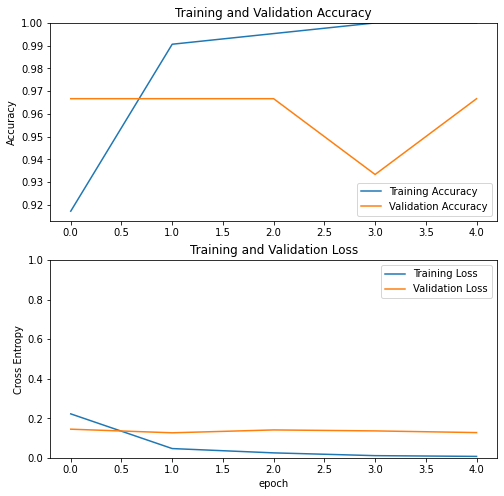

In [21]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

plt.figure(figsize=(8, 8))
plt.subplot(2, 1, 1)
plt.plot(acc, label='Training Accuracy')
plt.plot(val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.ylabel('Accuracy')
plt.ylim([min(plt.ylim()),1])
plt.title('Training and Validation Accuracy')

plt.subplot(2, 1, 2)
plt.plot(loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.ylabel('Cross Entropy')
plt.ylim([0,1.0])
plt.title('Training and Validation Loss')
plt.xlabel('epoch')
plt.show()

In [22]:
converter = tf.lite.TFLiteConverter.from_keras_model(model)
# converter.optimizations = [tf.lite.Optimize.DEFAULT]
tflite_model = converter.convert()

with open('mobilenet_v3.tflite', 'wb') as f:
  f.write(tflite_model)

/opt/conda/lib/python3.7/site-packages/keras/utils/generic_utils.py:497: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  category=CustomMaskWarning)


In [23]:
train_generator[0][0].shape

(32, 600, 600, 3)

In [24]:
sn = model.predict(train_generator[11][0])

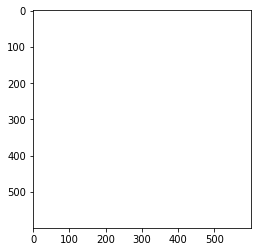

Label : blur


In [25]:
count = 5
plt.imshow(train_generator[11][0][count])
plt.show()

if sn[count][0]> sn[count][1]:
    
    print("Label : blur")
    
else:
    
    print("Label : sharp")

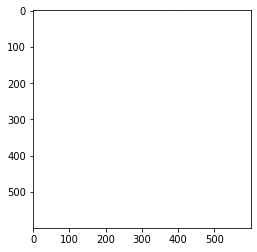

Label : blur


In [26]:
count = 0
plt.imshow(train_generator[11][0][count])
plt.show()

if sn[count][0]> sn[count][1]:
    
    print("Label : blur")
    
else:
    
    print("Label : sharp")